In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import networkx as nx
import osmnx as ox
import numpy as np

In [3]:
from rntools.demand import Demand as Demand
from rntools.utils import sample_demand
import rntools.visualization
import rntools.core
import rntools.io
import rntools.utils

# Simple Example

Sparsification Successful
The graph has 13 edges
Cost is 553.0683943798471


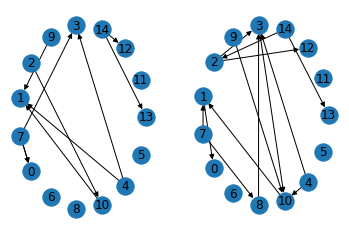

In [191]:
# Create a NetworkX graph
G = nx.DiGraph()
N, M = 15, 80
edges = np.random.randint(N, size=(M,2))
G.add_edges_from(edges)

# Sample the cost and capacity of the edges
capacities = np.random.uniform(1000, size=(M,))
costs = np.random.uniform(10, size=(M,))
for i, e in enumerate(G.edges):
    G.edges[e]['cost'] = costs[i]
    G.edges[e]['capacity'] = capacities[i]

# Sample a demand
origs, dests, rates = sample_demand(G, rate_range=(5,10))
demand = Demand(origs, dests, rates)
demand_backup = demand

# Solve the sparsification problem with rntools
simple = rntools.core.LPSparsifier(G, demand, lbda=0)
simple.solve()
print('Cost is', simple.compute_cost())
simple.nx_draw()

In [194]:
bisec = rntools.core.MILPBisectionSparsifier(G, demand, np.inf)
bisec.solve()

Sparsification Successful
The graph has 13.0 edges
Sparsification Successful
The graph has 13.0 edges
Sparsification Failed
Demand cannot be routed under current budget
Sparsification Successful
The graph has 12.0 edges
Sparsification Failed
Demand cannot be routed under current budget
Sparsification Successful
The graph has 11.0 edges


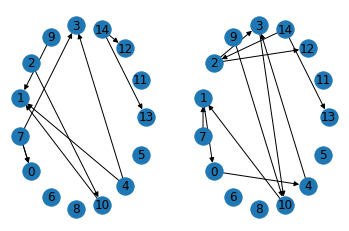

In [195]:
bisec.program.nx_draw()

In [196]:
bisec.

605.3443603829605

# Simple Road Network Example

In [122]:
# Load the graph
kamppi_graph = rntools.io.load_graph('./data/Kamppi.graphml')
rntools.utils.add_cost_and_capacity_metric(kamppi_graph)
kamppi_origs, kamppi_dests, kamppi_rates = sample_demand(kamppi_graph, num_od_pairs=20, rate_range=(5,10))
kamppi_demand = Demand(kamppi_origs, kamppi_dests, kamppi_rates)

In [141]:
# Linear program
print('-'*20, 'Linear program', '-'*20)
kamppi_lp = rntools.core.LPSparsifier(graph, rn_demand, lbda=0)
kamppi_lp.solve(); #kamppi_lp.ox_draw()

# MILP
print('-'*20, 'Mixed integer linear program','-'*20)
kamppi_milp = rntools.core.MILPSparsifier(kamppi_graph, kamppi_demand, lbda=0, budget=85)
kamppi_milp.solve(); #kamppi_milp_ox_draw()

-------------------- Linear program --------------------
Sparsification Successful
The graph has 112 edges
-------------------- Mixed integer linear program --------------------
Sparsification Successful
The graph has 85.0 edges


# Road Network Example

In [6]:
SFrn = rntools.io.read_MATSim_network('./data/SF.xml')
SFdemand = rntools.io.read_MATSim_demand('./data/SF_demand.xml', SFrn)

cannot match od pair to nodes in the network
cannot match od pair to nodes in the network
cannot match od pair to nodes in the network
cannot match od pair to nodes in the network
cannot match od pair to nodes in the network
cannot match od pair to nodes in the network


In [7]:
SFsubdemand = rntools.utils.sample_subdemand(SFdemand, 5)

In [8]:
SF_rn_tools = rntools.core.RNTools(SFrn, SFsubdemand)

SF_rn_tools.construct_LP(lbda=0, phi=5, num_samples=24)
SF_rn_tools.solve()

Academic license - for non-commercial use only
The graph has 239 edges


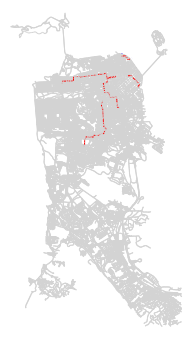

<Figure size 432x288 with 0 Axes>

In [292]:
SF_rn_tools.ox_draw(save=True, filename='lol')

In [9]:
len( SFrn.edges )

56247